In [1]:
from math import *
import os, sys
sys.path.append(os.getcwd() + '\..')
from qnoise import *
import matplotlib.pyplot as plt
import numpy as np

In [160]:
dzB = 23 # Magnetic field gradient
v = 2*pi*250e3 # Secular frequency
d = 310e-6 # Distance to electrode 
eta = 0.046 # Geometric factor
mc_voltage_source = Source(macro_voltage_spectrum, 0, voltage_Dz(dzB, v, d, eta, state="bare"))
mc_ambient_source = Source(lambda w: 8e-24, 0, dw_db("bare"))
mc_noise = Noise([mc_voltage_source, mc_ambient_source])

dzB = 150 # Magnetic field gradient
v = 2*pi*250e3 # Secular frequency
d = 150e-6 # Distance to electrode 
eta = 0.1 # Geometric factor
hf_voltage_source = Source(macro_voltage_spectrum, 0, voltage_Dz(dzB, v, d, eta, state="bare"))
hf_ambient_source = Source(lambda w: 1e-20, 0, dw_db("bare"))
hf_noise = Noise([hf_voltage_source, hf_ambient_source])

In [161]:
Omw = 2*pi*15e3
N = 1

tpi = 0.004
my_noise = hf_noise
T1 = my_noise.T1(Omw)
Tphi = my_noise.Tphi(Omw, N)
T2 = my_noise.T2(Omw, N)

f1 = my_noise.fdecay(tpi, 2*pi*15e3, 1)
f2 = my_noise.fdecayrabi(tpi, 2*pi/(tpi), 2*pi*15e3)

print('T1 : ' + str(T1) + '\nTphi : ' + str(Tphi) + '\nT2 : ' + str(T2) + '\nf1 : ' + str(f1)+ '\nf2 : ' + str(f2))

T1 : inf
Tphi : 0.0010549679558343585
T2 : 0.0010549679558343585
f1 : 3.6622825179786224e-80
f2 : 1.674453835692211e-11


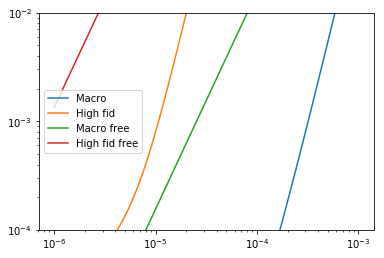

In [166]:
t_list = [10**t for t in np.linspace(-6, -3, 100)]
mc_rabi_list = [1-mc_noise.fdecayrabi(t, 2*pi/t,2*pi*10e3) for t in t_list]
mc_free_list = [1-mc_noise.fdecay(t, 2*pi*10e3) for t in t_list]
hf_rabi_list = [1-hf_noise.fdecayrabi(t, 2*pi/t,2*pi*10e3) for t in t_list]
hf_free_list = [1-hf_noise.fdecay(t, 2*pi*10e3) for t in t_list]
plt.loglog(t_list, mc_rabi_list)
plt.loglog(t_list, hf_rabi_list)
plt.loglog(t_list, mc_free_list)
plt.loglog(t_list, hf_free_list)
plt.legend(["Macro", "High fid", "Macro free", "High fid free"])
plt.ylim(0.0001, 0.01)
plt.show()

In [167]:
1/(10e-6)

99999.99999999999

In [22]:
 v_noise_source.noise_func(w) 

NameError: name 'w' is not defined